In [1]:
# 讀train檔
import pandas as pd
train = pd.read_csv('C:/Users/User/Documents/人工智慧【Artificial Intelligence】/作業/HW1/train.tsv', sep = '\t')

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer  #匯入Tokenizer，將用於建立字典

C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# 建立字典
token = Tokenizer(num_words=20000)    #使用Tokenizer建立token，20000字的字典
token.fit_on_texts(train['Phrase'])  #讀取'Phrase'的所有訓練資料

In [4]:
# 查看字典
print(token.word_index)  

{'ringing': 6959, 'lau': 12751, 'luminous': 10176, 'receives': 9835, 'recycled': 2205, 'forever': 12498, 'neighbor': 5944, 'shrewd': 3424, 'allegiance': 9003, 'proves': 635, 'unexpected': 805, 'acquired': 7134, 'recalls': 7387, 'winded': 5916, 'weinstein': 9603, 'hussein': 10132, 'ends': 624, 'moldering': 11576, 'turns': 477, 'opposed': 7306, 'wet': 2655, 'disgrace': 11968, 'borscht': 12956, 'activists': 11007, 'turn': 419, 'marilyn': 9045, 'clicking': 9928, 'shaw': 10861, 'departs': 11264, 'unforgettably': 10040, 'studied': 12299, 'charting': 14231, 'uzumaki': 14955, 'labors': 14954, 'treacle': 14962, 'extras': 10708, 'nuts': 8686, 'elvira': 15058, 'knockoff': 14515, 'pimps': 11385, 'miramax': 3184, 'winged': 12629, 'casting': 1133, 'bitten': 3779, 'carnage': 5291, 'egregious': 6848, 'manchild': 12609, 'goofy': 856, 'flim': 12131, 'ask': 1472, 'harps': 14423, 'draw': 3004, 'labor': 4879, 'alone': 956, 'enemies': 13886, 'vividly': 2351, 'bloodletting': 9948, 'auto': 5423, 'jazz': 5627,

In [5]:
# 將每一列文字轉換成一連串的數字，只有在字典的文字會轉換成數字
trainX_seq = token.texts_to_sequences(train['Phrase'])

In [6]:
# 查看原本的文字與轉換後的數字list
print(train['Phrase'][0])
print(trainX_seq[0])

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
[2, 323, 3, 14150, 6028, 1, 6586, 9, 52, 8, 46, 13, 1, 2976, 8, 177, 46, 13, 1, 10913, 65, 3, 78, 668, 10117, 19, 576, 3, 78, 2123, 5, 57, 3, 2, 42]


In [7]:
# 建立trainX，截長補短，maxlen設為30
# 若長度大於30，就截去前面的數字；若長度小於30，就在前面補0
trainX = sequence.pad_sequences(trainX_seq, maxlen = 30)
print(trainX)

[[   1 6586    9 ...    3    2   42]
 [   0    0    0 ...   13    1 2976]
 [   0    0    0 ...    0    2  323]
 ...
 [   0    0    0 ...    0 9376 9377]
 [   0    0    0 ...    0    0 9376]
 [   0    0    0 ...    0    0 9377]]


In [8]:
# 查看長度大於30的數字List，截去前面的數字
print(trainX_seq[0])
print(trainX[0])

[2, 323, 3, 14150, 6028, 1, 6586, 9, 52, 8, 46, 13, 1, 2976, 8, 177, 46, 13, 1, 10913, 65, 3, 78, 668, 10117, 19, 576, 3, 78, 2123, 5, 57, 3, 2, 42]
[    1  6586     9    52     8    46    13     1  2976     8   177    46
    13     1 10913    65     3    78   668 10117    19   576     3    78
  2123     5    57     3     2    42]


In [9]:
# 查看長度小於30的數字List，前面補0
print(trainX_seq[1])
print(trainX[1])

[2, 323, 3, 14150, 6028, 1, 6586, 9, 52, 8, 46, 13, 1, 2976]
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     2   323     3 14150  6028     1  6586     9
    52     8    46    13     1  2976]


In [10]:
# 建立trainY
# One-hot Encoding on 'Sentiment'
train = pd.get_dummies(train, columns=["Sentiment"])
trainY = train.iloc[:,3:8]
print(trainY)

        Sentiment_0  Sentiment_1  Sentiment_2  Sentiment_3  Sentiment_4
0                 0            1            0            0            0
1                 0            0            1            0            0
2                 0            0            1            0            0
3                 0            0            1            0            0
4                 0            0            1            0            0
5                 0            0            1            0            0
6                 0            0            1            0            0
7                 0            0            1            0            0
8                 0            0            1            0            0
9                 0            0            1            0            0
10                0            0            1            0            0
11                0            0            1            0            0
12                0            0            1            0      

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM

In [12]:
model = Sequential()
model.add(Embedding(output_dim=32,
                    input_dim=20000, 
                    input_length=30))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dense(units=256,
                activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=5,
                activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 32)            640000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               8448      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 658,053
Trainable params: 658,053
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [14]:
train_history = model.fit(trainX, trainY, batch_size=300, 
                          epochs=30, verbose=2,
                          validation_split=0.2)

Train on 124848 samples, validate on 31212 samples
Epoch 1/30
 - 40s - loss: 0.3979 - acc: 0.8351 - val_loss: 0.3758 - val_acc: 0.8425
Epoch 2/30
 - 36s - loss: 0.3462 - acc: 0.8548 - val_loss: 0.3581 - val_acc: 0.8448
Epoch 3/30
 - 39s - loss: 0.3074 - acc: 0.8628 - val_loss: 0.3375 - val_acc: 0.8480
Epoch 4/30
 - 39s - loss: 0.2857 - acc: 0.8705 - val_loss: 0.3358 - val_acc: 0.8505
Epoch 5/30
 - 38s - loss: 0.2760 - acc: 0.8755 - val_loss: 0.3350 - val_acc: 0.8496
Epoch 6/30
 - 37s - loss: 0.2692 - acc: 0.8782 - val_loss: 0.3365 - val_acc: 0.8488
Epoch 7/30
 - 39s - loss: 0.2636 - acc: 0.8809 - val_loss: 0.3365 - val_acc: 0.8490
Epoch 8/30
 - 40s - loss: 0.2592 - acc: 0.8829 - val_loss: 0.3393 - val_acc: 0.8492
Epoch 9/30
 - 39s - loss: 0.2553 - acc: 0.8849 - val_loss: 0.3427 - val_acc: 0.8479
Epoch 10/30
 - 39s - loss: 0.2519 - acc: 0.8863 - val_loss: 0.3442 - val_acc: 0.8491
Epoch 11/30
 - 36s - loss: 0.2492 - acc: 0.8871 - val_loss: 0.3424 - val_acc: 0.8481
Epoch 12/30
 - 35s - lo

In [15]:
%pylab inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

Populating the interactive namespace from numpy and matplotlib


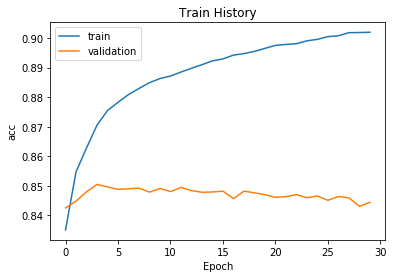

In [16]:
show_train_history(train_history,'acc','val_acc')

In [17]:
# 處理test檔
test = pd.read_csv('C:/Users/User/Documents/人工智慧【Artificial Intelligence】/作業/HW1/test.tsv', sep = '\t')
testX_seq = token.texts_to_sequences(test['Phrase'])
testX = sequence.pad_sequences(testX_seq, maxlen = 30)

# 預測testY
testY = model.predict_classes(testX)
testY = pd.DataFrame({'PhraseId': test.PhraseId, 'Sentiment': testY})

# 轉成csv檔
testY.to_csv('sample_submission.csv', index=False, header = True)